In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  

def showImage(img, im_name) :
    fig = plt.figure()
    ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax1.set_title(im_name)
    plt.imshow(img, cmap="gray" )

In [24]:
im_name = "data/stacked_image.jpg"
# im_name = "data/frame.jpg"
img = cv2.imread(im_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

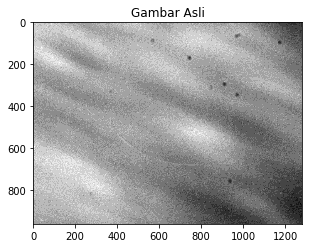

In [25]:
showImage(img, "Gambar Asli")

# Image Enhancement

## Spatial Image Enhancement

Implementasi dengan bantuan library PIL

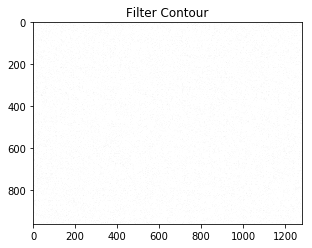

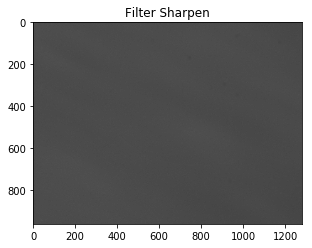

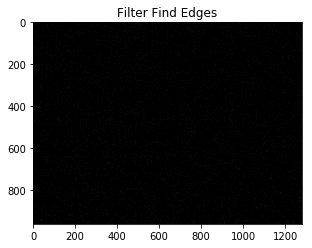

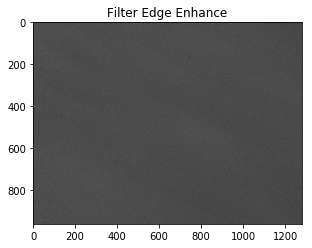

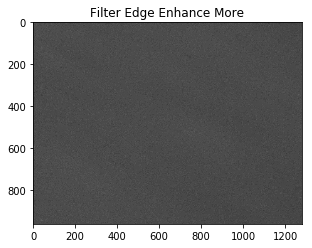

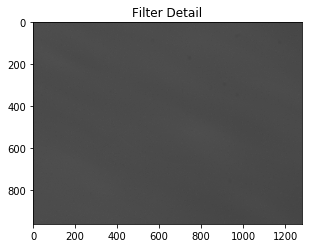

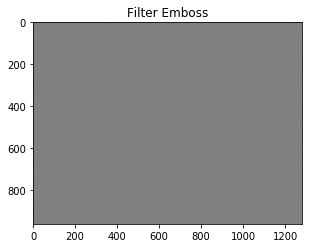

In [26]:
from PIL import Image
from PIL import ImageFilter

im = Image.fromarray(img)

im1 = im.filter(ImageFilter.CONTOUR)
im2 = im.filter(ImageFilter.SHARPEN)
im3 = im.filter(ImageFilter.FIND_EDGES)
im4 = im.filter(ImageFilter.EDGE_ENHANCE)
im5 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
im6 = im.filter(ImageFilter.DETAIL)
im7 = im.filter(ImageFilter.EMBOSS)

showImage(im1, "Filter Contour")
showImage(im2, "Filter Sharpen")
showImage(im3, "Filter Find Edges")
showImage(im4, "Filter Edge Enhance")
showImage(im5, "Filter Edge Enhance More")
showImage(im6, "Filter Detail")
showImage(im7, "Filter Emboss")

## Frequency Domain Image Enhancement
### Fourier Transform

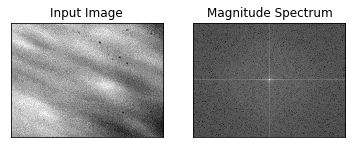

In [33]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

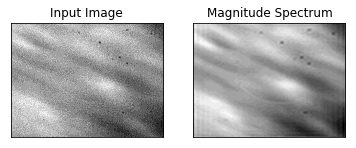

[[239 240 241 ... 237 238 239]
 [240 241 241 ... 237 238 239]
 [240 241 242 ... 237 238 239]
 ...
 [239 240 240 ... 236 237 238]
 [239 240 241 ... 237 237 238]
 [239 240 241 ... 237 238 238]]


In [34]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

img_back = img_back.astype(np.float32) / img_back.max()
img_back = 255 * img_back  # Now scale by 255
img_back = img_back.astype(np.uint8)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
print(img_back)

### Coba-coba Gabungin FFT dan Spatial Filter

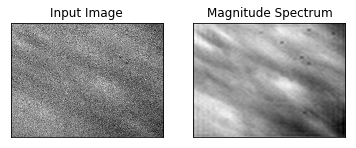

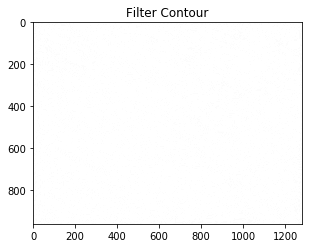

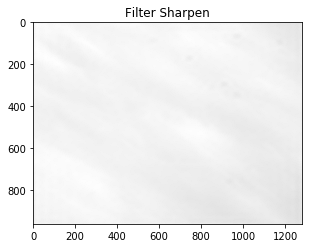

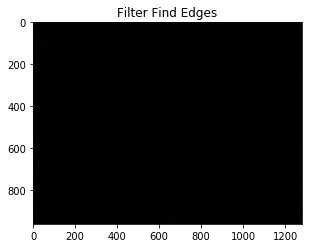

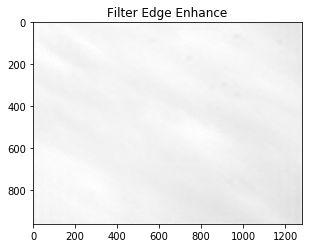

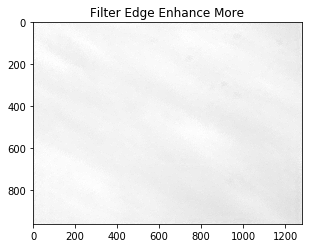

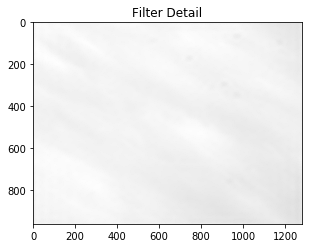

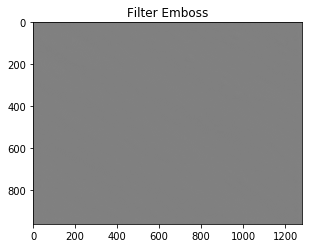

In [44]:
from PIL import Image
from PIL import ImageFilter

## Convert back again
img_back = img_back.astype(np.float32) / img_back.max() # normalize the data to 0 - 1
img_back = 255 * img_back # Now scale by 255
coba = img_back.astype(np.uint8)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(coba, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

im = Image.fromarray(coba)

im1 = im.filter(ImageFilter.CONTOUR)
im2 = im.filter(ImageFilter.SHARPEN)
im3 = im.filter(ImageFilter.FIND_EDGES)
im4 = im.filter(ImageFilter.EDGE_ENHANCE)
im5 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
im6 = im.filter(ImageFilter.DETAIL)
im7 = im.filter(ImageFilter.EMBOSS)

showImage(im1, "Filter Contour")
showImage(im2, "Filter Sharpen")
showImage(im3, "Filter Find Edges")
showImage(im4, "Filter Edge Enhance")
showImage(im5, "Filter Edge Enhance More")
showImage(im6, "Filter Detail")
showImage(im7, "Filter Emboss")